In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('titanic.csv')

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
df.Age = df.Age.fillna(df.Age.mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
df.Embarked = df.Embarked.fillna('S')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
df.Sex = df.Sex.apply(lambda x: 1 if x == 'male' else 0)

df.Sex.value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [14]:
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)

df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0   
1         1       1    0  38.0      1      0  71.2833           1           0   
2         1       3    0  26.0      0      0   7.9250           0           0   
3         1       1    0  35.0      1      0  53.1000           0           0   
4         0       3    1  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [15]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Survived == 0]
df_minority = df[df.Survived == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement to allow for upsampling
                                 n_samples=len(df_majority),  # to match majority class size
                                 random_state=123) # reproducible results

# Combine upsampled minority class with majority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_balanced.Survived.value_counts()


Survived
0    549
1    549
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler

df = df_balanced.copy()

scaler = MinMaxScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  \
0         0       3    1  0.268877      1      0  0.014151           0   
4         0       3    1  0.432749      0      0  0.015713           0   
5         0       3    1  0.365929      0      0  0.016510           0   
6         0       1    1  0.672255      0      0  0.101229           0   
7         0       3    1  0.016765      3      1  0.041136           0   

   Embarked_Q  Embarked_S  
0           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Survived')
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       176
           1       0.86      0.84      0.85       154

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330



In [19]:
y_pred_train = model.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       373
           1       0.88      0.82      0.85       395

    accuracy                           0.85       768
   macro avg       0.85      0.85      0.85       768
weighted avg       0.85      0.85      0.85       768



In [20]:
print(model.score(X_test, y_test))

0.8606060606060606


In [21]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

grid = GridSearchCV(model, param_grid, cv=5, verbose=3)

grid.fit(X_train, y_train)

print(grid.best_params_)

print(grid.best_score_)

y_pred = grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.753 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.719 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.760 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.773 total time=   0.3s
[CV 3/

In [23]:
est = grid.best_estimator_

print(est.score(X_test, y_test))
print(est.score(X_train, y_train))

print(grid.best_params_)

0.8696969696969697
0.8984375
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [27]:
grid_random = {
    'random_state':range(1, 101)
}

model = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1000)

grid2 = GridSearchCV(model, grid_random, cv=5, verbose=3)

grid2.fit(X_train, y_train)

print(grid2.best_params_)
print(grid2.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ....................random_state=1;, score=0.838 total time=   1.0s
[CV 2/5] END ....................random_state=1;, score=0.805 total time=   1.0s
[CV 3/5] END ....................random_state=1;, score=0.805 total time=   1.1s
[CV 4/5] END ....................random_state=1;, score=0.824 total time=   1.0s
[CV 5/5] END ....................random_state=1;, score=0.824 total time=   1.0s
[CV 1/5] END ....................random_state=2;, score=0.844 total time=   0.9s
[CV 2/5] END ....................random_state=2;, score=0.779 total time=   0.9s
[CV 3/5] END ....................random_state=2;, score=0.805 total time=   0.9s
[CV 4/5] END ....................random_state=2;, score=0.817 total time=   1.0s
[CV 5/5] END ....................random_state=2;, score=0.830 total time=   0.9s
[CV 1/5] END ....................random_state=3;, score=0.844 total time=   1.0s
[CV 2/5] END ....................random_state=

In [29]:
est2 = grid2.best_estimator_

y_pred = est2.predict(X_test)

print(classification_report(y_test, y_pred))

print(est2.score(X_test, y_test))
print(est2.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       176
           1       0.88      0.84      0.86       154

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330

0.8727272727272727
0.90234375


In [33]:
#linear search

model3 = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42)

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print(classification_report(y_test, y_pred))

print(model3.score(X_test, y_test))
print(model3.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       176
           1       0.85      0.94      0.90       154

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330

0.896969696969697
0.9869791666666666


In [38]:
#linear search for random_state
from sklearn.metrics import accuracy_score
def linear_search_random_state(X_train, y_train, X_test, y_test, max_state=1000):
    best_accuracy = 0
    best_state = None
    
    # Iterate over the range of random states
    for state in range(1, max_state + 1):
        # Create a RandomForest model with the current random state
        model = RandomForestClassifier(
            criterion='entropy',
            max_depth=None,
            min_samples_leaf=1,
            min_samples_split=2,
            n_estimators=100,
            random_state=state
        )
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict on the test set
        current_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        
        # Print the current state and accuracy for tracking progress
        print(f"Random State: {state}, Accuracy: {current_accuracy}")
        
        # Update the best accuracy and state if the current accuracy is better
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_state = state
    
    return best_state, best_accuracy

best_state, best_accuracy = linear_search_random_state(X_train, y_train, X_test, y_test)

print(f"Best Random State: {best_state}, Best Accuracy: {best_accuracy}")



Random State: 1, Accuracy: 0.8818181818181818
Random State: 2, Accuracy: 0.896969696969697
Random State: 3, Accuracy: 0.8878787878787879
Random State: 4, Accuracy: 0.8939393939393939
Random State: 5, Accuracy: 0.8878787878787879
Random State: 6, Accuracy: 0.8848484848484849
Random State: 7, Accuracy: 0.8939393939393939
Random State: 8, Accuracy: 0.8818181818181818
Random State: 9, Accuracy: 0.8818181818181818
Random State: 10, Accuracy: 0.8848484848484849
Random State: 11, Accuracy: 0.8909090909090909
Random State: 12, Accuracy: 0.8787878787878788
Random State: 13, Accuracy: 0.8909090909090909
Random State: 14, Accuracy: 0.8818181818181818
Random State: 15, Accuracy: 0.8939393939393939
Random State: 16, Accuracy: 0.8909090909090909
Random State: 17, Accuracy: 0.896969696969697
Random State: 18, Accuracy: 0.8848484848484849
Random State: 19, Accuracy: 0.8818181818181818
Random State: 20, Accuracy: 0.8818181818181818
Random State: 21, Accuracy: 0.8939393939393939
Random State: 22, Accura

# Best Model!!

In [37]:
best_state = 867

model4 = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=best_state)

model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

print(classification_report(y_test, y_pred))

print(model4.score(X_test, y_test))
print(model4.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       176
           1       0.86      0.95      0.90       154

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

0.906060606060606
0.9869791666666666


In [40]:
def linear_search_random_state1k(X_train, y_train, X_test, y_test, max_state=1000):
    best_accuracy = 0
    best_state = None
    
    # Iterate over the range of random states
    for state in range(1, max_state + 1):
        # Create a RandomForest model with the current random state
        model = RandomForestClassifier(
            criterion='entropy',
            max_depth=None,
            min_samples_leaf=1,
            min_samples_split=2,
            n_estimators=1000,
            random_state=state
        )
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict on the test set
        current_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
        
        # Print the current state and accuracy for tracking progress
        print(f"Random State: {state}, Accuracy: {current_accuracy}")
        
        # Update the best accuracy and state if the current accuracy is better
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_state = state
    
    return best_state, best_accuracy

best_state, best_accuracy = linear_search_random_state1k(X_train, y_train, X_test, y_test)

print(f"Best Random State: {best_state}, Best Accuracy: {best_accuracy}")

Random State: 1, Accuracy: 0.8939393939393939
Random State: 2, Accuracy: 0.8939393939393939
Random State: 3, Accuracy: 0.8878787878787879
Random State: 4, Accuracy: 0.8909090909090909
Random State: 5, Accuracy: 0.8939393939393939
Random State: 6, Accuracy: 0.8939393939393939
Random State: 7, Accuracy: 0.8909090909090909
Random State: 8, Accuracy: 0.8939393939393939
Random State: 9, Accuracy: 0.896969696969697
Random State: 10, Accuracy: 0.8909090909090909
Random State: 11, Accuracy: 0.8939393939393939
Random State: 12, Accuracy: 0.896969696969697
Random State: 13, Accuracy: 0.8909090909090909
Random State: 14, Accuracy: 0.8939393939393939
Random State: 15, Accuracy: 0.8939393939393939
Random State: 16, Accuracy: 0.8878787878787879
Random State: 17, Accuracy: 0.896969696969697
Random State: 18, Accuracy: 0.8939393939393939
Random State: 19, Accuracy: 0.8939393939393939
Random State: 20, Accuracy: 0.896969696969697
Random State: 21, Accuracy: 0.8909090909090909
Random State: 22, Accuracy

In [134]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=4, random_state=42)

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       112
           1       0.71      0.80      0.75        94

    accuracy                           0.76       206
   macro avg       0.76      0.76      0.76       206
weighted avg       0.76      0.76      0.76       206



In [135]:
y_pred_train = model2.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       230
           1       0.83      0.86      0.84       248

    accuracy                           0.83       478
   macro avg       0.83      0.83      0.83       478
weighted avg       0.83      0.83      0.83       478



In [136]:
model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

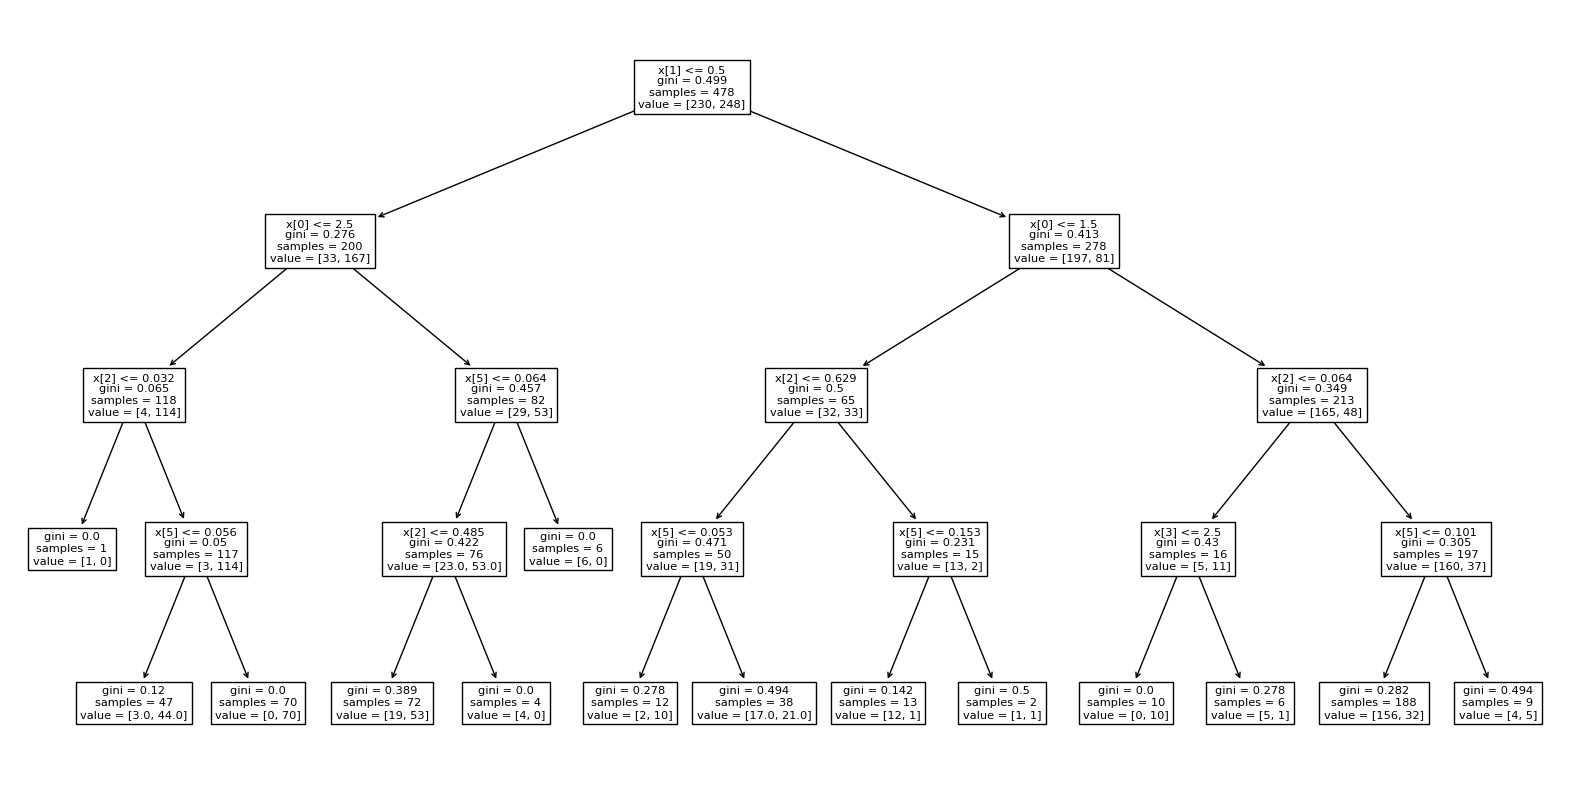

In [137]:
from sklearn import tree


plt.figure(figsize=(20,10))
tree.plot_tree(model2)
plt.show()